<a href="https://colab.research.google.com/github/Rishikesh400/Neural-Network-On-MNIST-Dataset/blob/master/Neural_Network_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
(X_train, Y_train) , (X_test, Y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

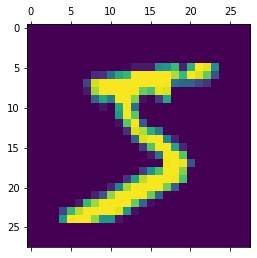

In [7]:
plt.matshow(X_train[0])

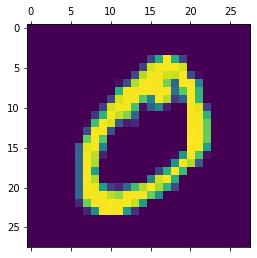

In [8]:
plt.matshow(X_train[1])

In [9]:
Y_train[1]

0

In [10]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
## Here we are scaling the values to improve the accuracy
## We often used this scaling in machine learning
## Maximum values is 255 hence we are dividing all the values 
## To change the values between 0 to 1
X_train = X_train / 255
X_test = X_test / 255

In [13]:
## We have to flatten this two dimensional array into one dimension
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [16]:
#X_train_flattened[0]

In [17]:
## Dense means all the neurons are connected to the all outputs directly
## 10 is the output size because we have to predict numbers from 0 to 9.
## So these are 10 numbers.
model = keras.Sequential([
                  keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 959us/step - loss: 0.4889 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 2s 951us/step - loss: 0.3061 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 2s 940us/step - loss: 0.2854 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 944us/step - loss: 0.2750 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 941us/step - loss: 0.2679 - accuracy: 0.9260


In [18]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 0s 697us/step - loss: 0.2664 - accuracy: 0.9259


[0.2664451003074646, 0.9258999824523926]

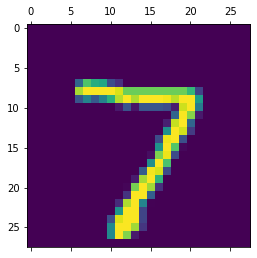

In [19]:
plt.matshow(X_test[0])

In [20]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

array([1.7144665e-05, 1.4889910e-10, 3.3619846e-05, 7.9678595e-03,
       1.7358982e-06, 1.1578638e-04, 1.1145186e-09, 6.7792201e-01,
       1.1341927e-04, 8.5932016e-04], dtype=float32)

In [21]:
## So our prediction is right
np.argmax(y_pred[0])

7

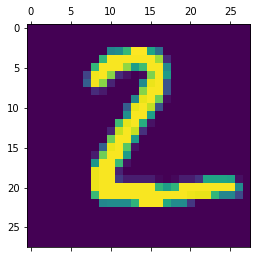

In [22]:
plt.matshow(X_test[1])

In [23]:
np.argmax(y_pred[1])

2

In [24]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [25]:
## We are converting values into 0 to 9 numbers
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [26]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    0,    5,    7,    2,    3,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,   10,  915,   15,   13,    6,   13,   12,   40,    3],
       [   4,    0,   18,  896,    2,   42,    2,   11,   27,    8],
       [   1,    1,    2,    1,  930,    0,   11,    3,    9,   24],
       [   7,    2,    2,   15,   10,  800,   14,    4,   31,    7],
       [   8,    3,    4,    1,    8,   17,  912,    2,    3,    0],
       [   1,    5,   23,    6,    9,    1,    0,  938,    4,   41],
       [   4,    7,    5,   15,   10,   25,    7,    8,  887,    6],
       [   9,    6,    1,    7,   40,    8,    0,   15,   13,  910]],
      dtype=int32)>

Text(159.0, 0.5, 'Actual')

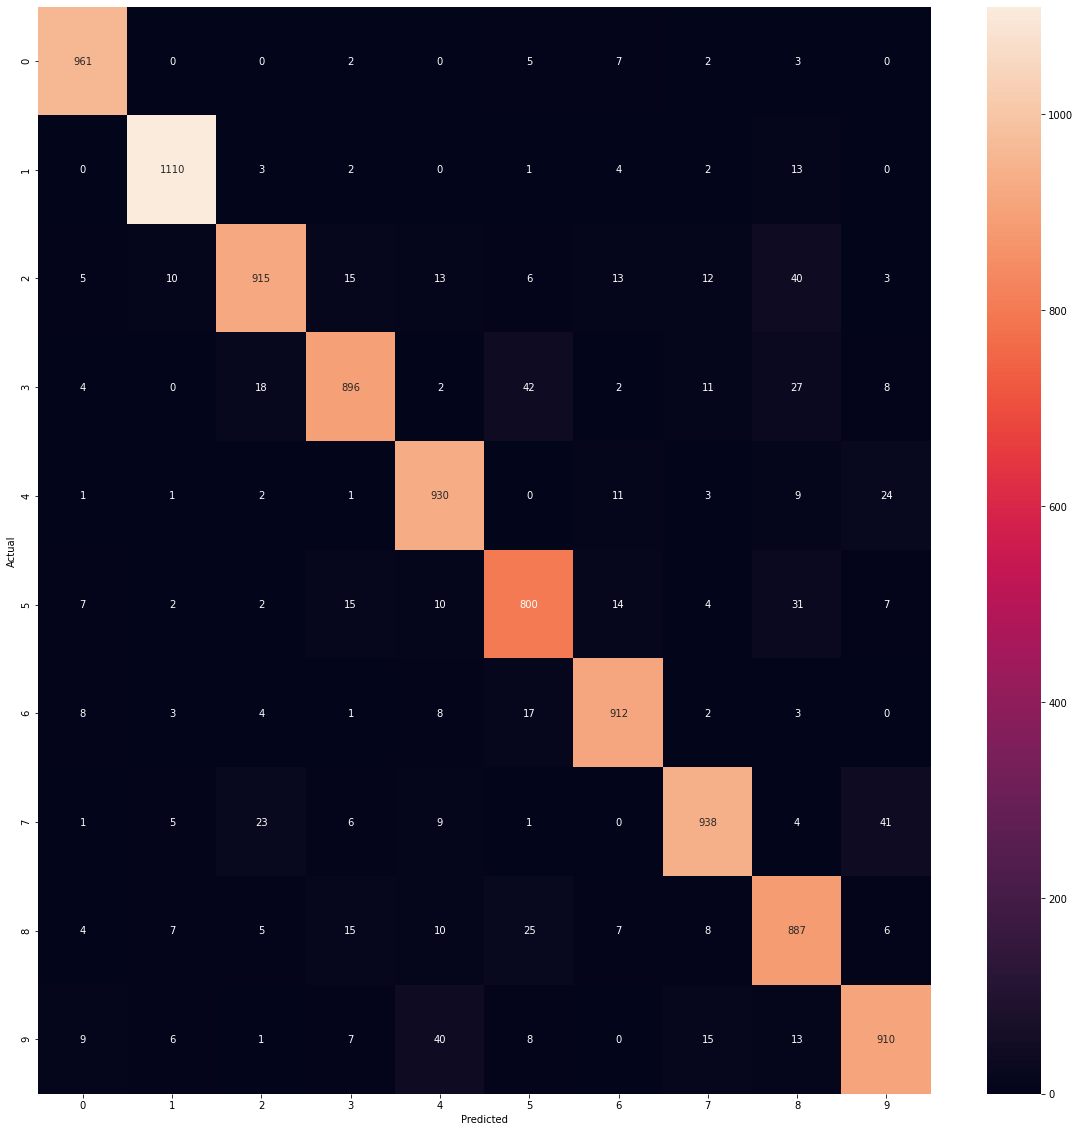

In [27]:
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [28]:
## Now we are going to add hidden layers to improve the model
## Here we are taking 100 neurons it's an actually trial and error
## We should do trial and error to pick neuron numbers
model_hidden = keras.Sequential([
                  ## Hidden Layer
                  keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                  
                  keras.layers.Dense(10, activation='sigmoid')
])
model_hidden.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model_hidden.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2984 - accuracy: 0.9156
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1406 - accuracy: 0.9586
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0993 - accuracy: 0.9703
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0781 - accuracy: 0.9762
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0622 - accuracy: 0.9811


In [29]:
model_hidden.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 0s 800us/step - loss: 0.0922 - accuracy: 0.9718


[0.09224355220794678, 0.9718000292778015]

In [30]:
y_pred = model.predict(X_test_flattened)
## We are converting values into 0 to 9 numbers
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    0,    5,    7,    2,    3,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,   10,  915,   15,   13,    6,   13,   12,   40,    3],
       [   4,    0,   18,  896,    2,   42,    2,   11,   27,    8],
       [   1,    1,    2,    1,  930,    0,   11,    3,    9,   24],
       [   7,    2,    2,   15,   10,  800,   14,    4,   31,    7],
       [   8,    3,    4,    1,    8,   17,  912,    2,    3,    0],
       [   1,    5,   23,    6,    9,    1,    0,  938,    4,   41],
       [   4,    7,    5,   15,   10,   25,    7,    8,  887,    6],
       [   9,    6,    1,    7,   40,    8,    0,   15,   13,  910]],
      dtype=int32)>

Text(159.0, 0.5, 'Actual')

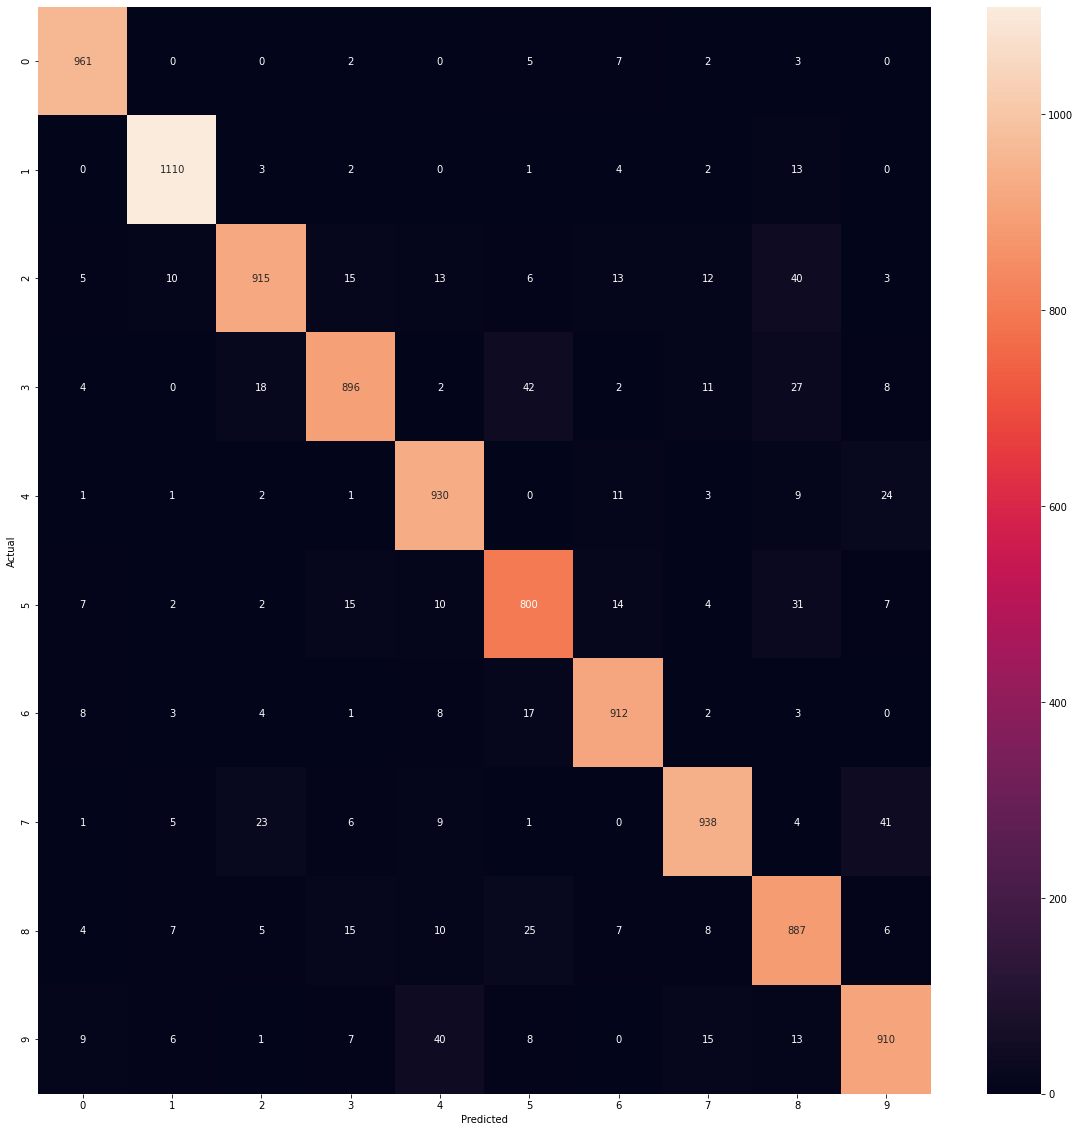

In [31]:
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [32]:
model_hidden = keras.Sequential([
                  keras.layers.Flatten(input_shape=(28, 28)),
                  ## Hidden Layer
                  keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                  
                  keras.layers.Dense(10, activation='sigmoid')
])
model_hidden.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model_hidden.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2891 - accuracy: 0.9190
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1314 - accuracy: 0.9616
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0945 - accuracy: 0.9718
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0756 - accuracy: 0.9777
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0611 - accuracy: 0.9816


In [33]:
model_hidden.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 0s 949us/step - loss: 0.0916 - accuracy: 0.9736


[0.09156675636768341, 0.9735999703407288]

In [34]:
y_pred = model.predict(X_test_flattened)
## We are converting values into 0 to 9 numbers
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    0,    5,    7,    2,    3,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,   10,  915,   15,   13,    6,   13,   12,   40,    3],
       [   4,    0,   18,  896,    2,   42,    2,   11,   27,    8],
       [   1,    1,    2,    1,  930,    0,   11,    3,    9,   24],
       [   7,    2,    2,   15,   10,  800,   14,    4,   31,    7],
       [   8,    3,    4,    1,    8,   17,  912,    2,    3,    0],
       [   1,    5,   23,    6,    9,    1,    0,  938,    4,   41],
       [   4,    7,    5,   15,   10,   25,    7,    8,  887,    6],
       [   9,    6,    1,    7,   40,    8,    0,   15,   13,  910]],
      dtype=int32)>

Text(159.0, 0.5, 'Actual')

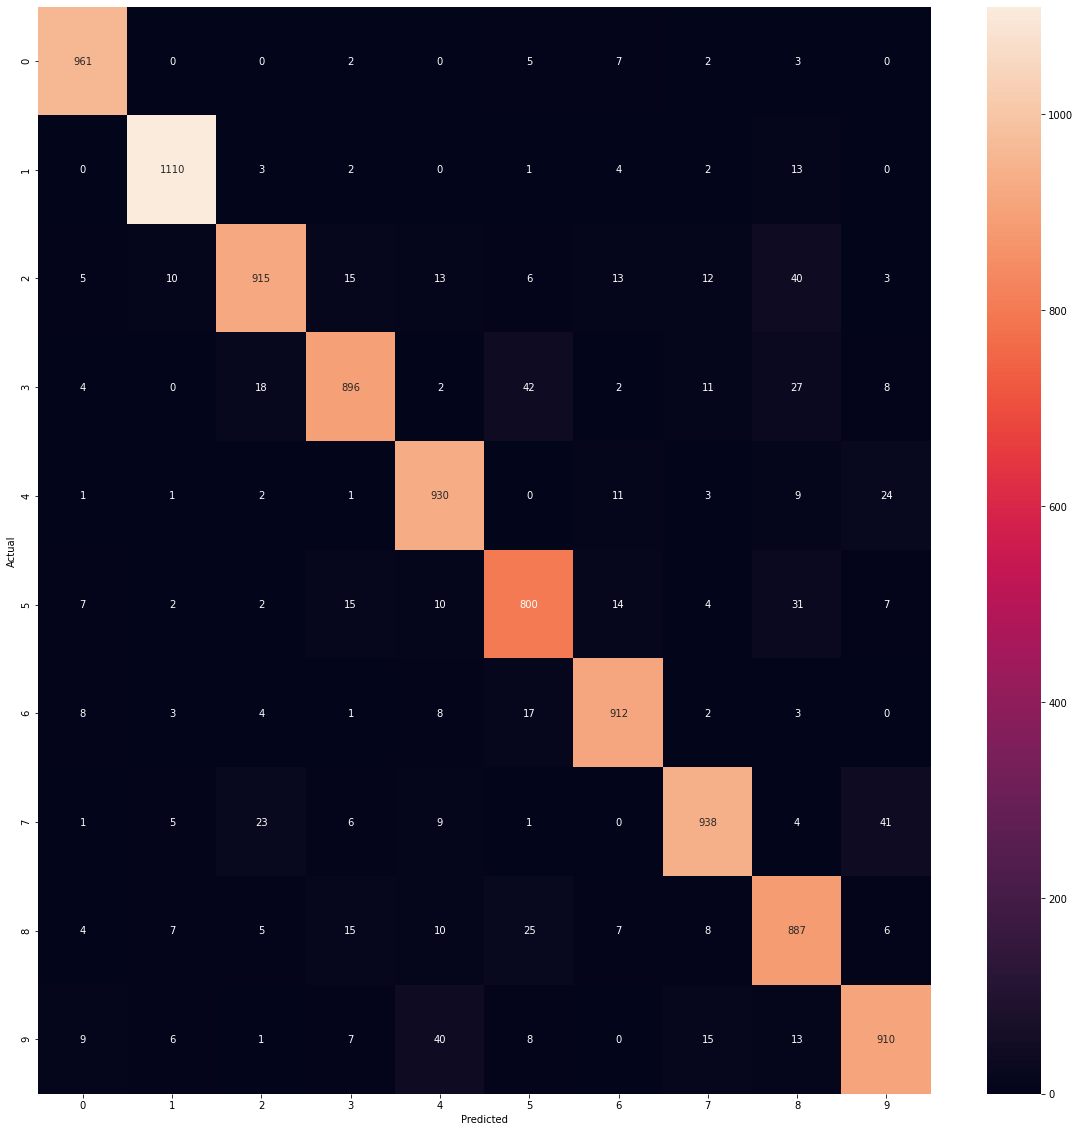

In [35]:
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')